In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


In [123]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
#importing datasets
train = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/train.csv", nrows = 1000000)
test = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/test.csv")

In [125]:
train.shape

(1000000, 8)

In [126]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [127]:
test.shape

(9914, 7)

In [128]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [129]:
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [130]:
train.shape

(1000000, 8)

In [131]:
train['fare_amount'].describe()

count    1000000.000000
mean          11.348079
std            9.822090
min          -44.900000
25%            6.000000
50%            8.500000
75%           12.500000
max          500.000000
Name: fare_amount, dtype: float64

In [132]:
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 999962, True: 38})

In [133]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(999962, 8)

In [134]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    999962.000000
mean         11.348742
std           9.821550
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [135]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False).head()

101885    500.0
247671    495.0
287638    450.0
329010    450.0
233874    450.0
Name: fare_amount, dtype: float64

In [136]:
train['passenger_count'].describe()

count    999962.000000
mean          1.684925
std           1.323912
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [137]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [138]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [139]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    999961.000000
mean         39.929057
std           7.626092
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

Quick Googling gave me this info

Latitudes range from -90 to 90. Longitudes range from -180 to 180. The above describe clearly shows some outliers. Let's filter them

In [140]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [141]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [142]:
train.shape

(999961, 8)

In [143]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis = 0)

In [144]:
train.shape

(999958, 8)

In [145]:
train = train.drop((train[train['pickup_latitude']> 90]).index, axis = 0)

In [146]:
train.shape

(999949, 8)

In [147]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [148]:
train = train.drop((train[train['pickup_longitude']<-180]).index, axis = 0)

In [149]:
train.shape

(999938, 8)

In [150]:
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
579901,2013-08-14 20:23:00.000000245,18.0,2013-08-14 20:23:00 UTC,-73.99919,40.7202,-0.36,-3114.338567,1


In [151]:
train = train.drop((train[train['dropoff_latitude']<-90]).index, axis = 0)

In [152]:
train.shape

(999937, 8)

In [153]:
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59 UTC,-73.977635,40.754687,-73.870432,405.650000,1
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00 UTC,-73.870875,40.773792,-73.977790,404.716667,1
748464,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00 UTC,-74.015200,40.709665,-40.719295,1651.553433,5
889704,2012-05-21 12:15:00.00000098,15.3,2012-05-21 12:15:00 UTC,-74.001292,40.727560,-73.953047,404.466667,1


In [154]:
train = train.drop((train[train['dropoff_latitude']>90]).index, axis = 0)

In [155]:
train.shape

(999930, 8)

In [156]:
train[train['dropoff_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
269695,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00 UTC,-73.997572,40.720945,-1329.621332,40.773717,1
282374,2011-04-25 13:09:00.000000123,5.7,2011-04-25 13:09:00 UTC,-73.987105,40.755732,-732.600000,40.744832,1
449263,2012-01-28 16:51:00.00000088,6.9,2012-01-28 16:51:00 UTC,-73.983142,40.741987,-736.500000,40.755255,1
472273,2012-02-09 17:42:00.000000250,49.8,2012-02-09 17:42:00 UTC,-73.937167,40.758112,-736.083333,40.758112,6
666352,2012-03-16 22:02:00.000000257,4.9,2012-03-16 22:02:00 UTC,-73.992605,40.726815,-472.266667,40.733332,1
757003,2012-04-29 20:45:00.000000211,3.3,2012-04-29 20:45:00 UTC,-73.990675,40.761037,-736.550000,40.760182,5
858760,2012-06-19 07:41:00.00000019,6.1,2012-06-19 07:41:00 UTC,-73.982467,40.771612,-736.416665,40.764310,1
907792,2012-02-18 00:22:00.0000001,8.1,2012-02-18 00:22:00 UTC,-73.991215,40.750727,-740.000000,40.726617,1
967162,2012-02-09 17:42:00.000000178,5.7,2012-02-09 17:42:00 UTC,-74.006390,40.739552,-740.066667,40.724792,1


In [157]:
train = train.drop((train[train['dropoff_longitude']<-180]).index, axis = 0)

In [158]:
train.shape

(999921, 8)

In [159]:
train[train['dropoff_longitude'] > 180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [160]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999921.000000,999921.000000,999921.000000,999911.000000,999911.000000,999921.000000
mean,11.348723,-72.517336,39.926762,-72.515537,39.926038,1.684717
std,9.821537,10.393487,6.089339,10.396301,6.093210,1.307726
min,0.000000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


In [161]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

**key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime**

In [162]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [163]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

**Now, for EDA. The following are my considerations** -
Does the number of passengers affect the fare? Does the date and time of pickup affect the fare? Does the day of the week affect the fare? Does the distance travelled affect the fare? First, let's split the datetime field 'pickup_datetime' to the following -

year month date hour day of week Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

In [164]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [165]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [166]:
train['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [167]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [168]:
test['H_Distance'].head(10)

0     2.323260
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

**Now that we have calculated the distance, we shall create columns for the following -
year month date hour day of week**

In [169]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

Text(0, 0.5, 'Frequency')

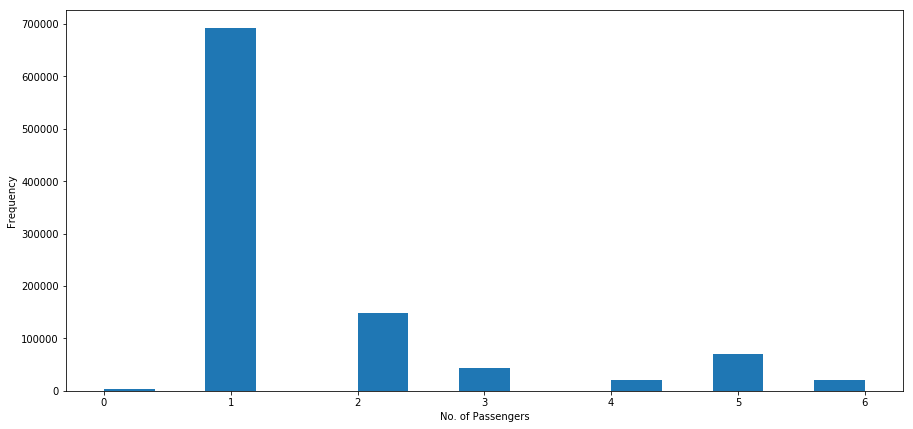

In [170]:
# 1. Does the number of passengers affect the fare?
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

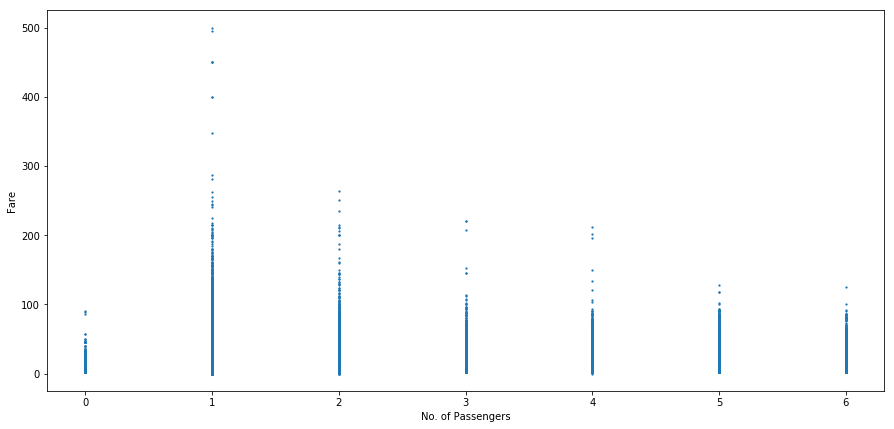

In [171]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

**From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.**

Text(0, 0.5, 'Fare')

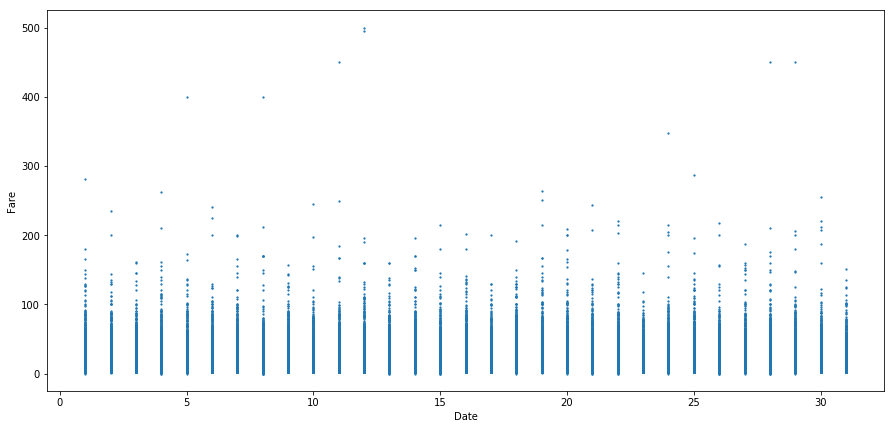

In [172]:
# 2. Does the date and time of pickup affect the fare?
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

**The fares throught the month mostly seem uniform, with the maximum fare received on the 12th**

Text(0, 0.5, 'Frequency')

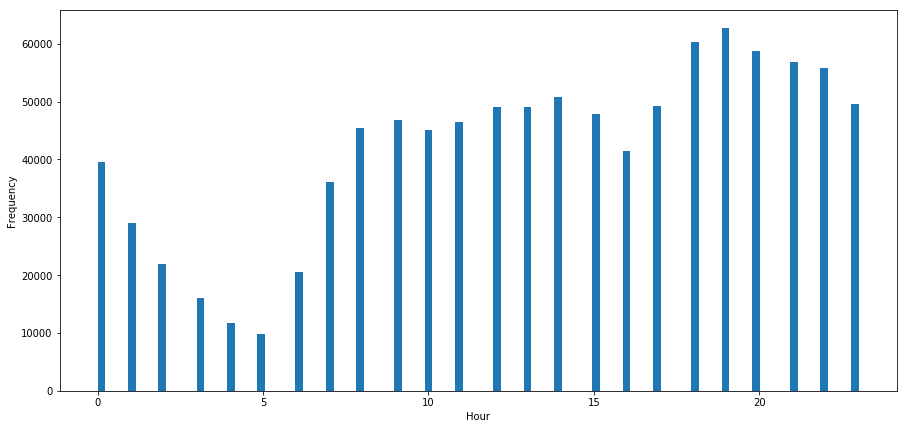

In [173]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

**Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.**

Text(0, 0.5, 'Fare')

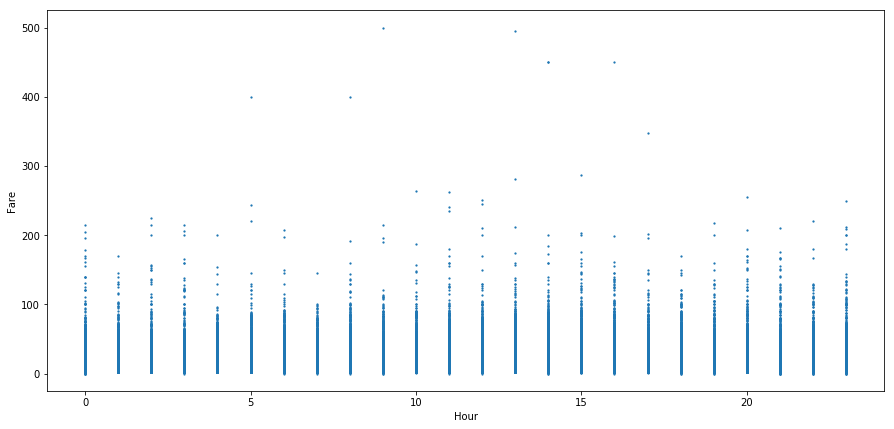

In [174]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

**The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?**

Text(0, 0.5, 'Frequency')

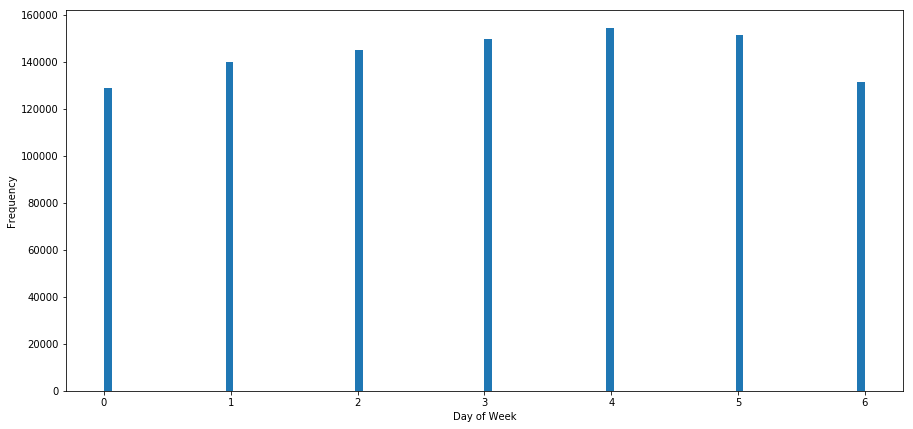

In [175]:
#3. Does the day of the week affect the fare?
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

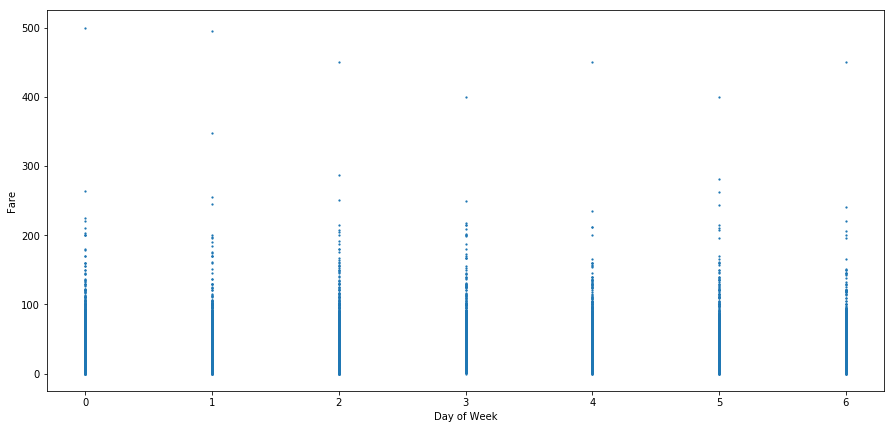

In [176]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work.

Does the distance affect the fare?
This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [177]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [178]:

bins_4.head()

,H_Distance,bins
5663,101.094619,100-200
10710,129.950483,100-200
11619,127.509261,100-200
12228,123.561156,100-200
14536,129.560455,100-200


**There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following -**
Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0 vice versa of point 1. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [180]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30+00:00,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [181]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [182]:
train.shape

(999920, 14)

In [183]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [184]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [185]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [186]:
train.shape

(999917, 14)

In [187]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [188]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [189]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997656,2012-01-21 01:43:00.000000134,26.5,2012-01-21 01:43:00+00:00,0.000000,0.000000,-73.954157,40.741552,1,8663.362917,2012,1,21,5,1
997786,2012-02-27 21:12:17.000000300,13.7,2012-02-27 21:12:17+00:00,-73.991041,40.733201,0.000000,0.000000,1,8666.246213,2012,2,27,0,21
998269,2012-10-19 16:56:00.000000300,32.3,2012-10-19 16:56:00+00:00,0.000000,40.750597,-73.863035,40.767178,1,6020.822520,2012,10,19,4,16
998717,2014-07-24 21:48:00.000000155,6.5,2014-07-24 21:48:00+00:00,0.000000,0.000000,-73.991420,40.750400,1,8666.629589,2014,7,24,3,21


1938 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

distance = (fare_amount - 2.5)/1.56

In [190]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997656,2012-01-21 01:43:00.000000134,26.5,2012-01-21 01:43:00+00:00,0.000000,0.000000,-73.954157,40.741552,1,15.384615,2012,1,21,5,1
997786,2012-02-27 21:12:17.000000300,13.7,2012-02-27 21:12:17+00:00,-73.991041,40.733201,0.000000,0.000000,1,7.179487,2012,2,27,0,21
998269,2012-10-19 16:56:00.000000300,32.3,2012-10-19 16:56:00+00:00,0.000000,40.750597,-73.863035,40.767178,1,19.102564,2012,10,19,4,16
998717,2014-07-24 21:48:00.000000155,6.5,2014-07-24 21:48:00+00:00,0.000000,0.000000,-73.991420,40.750400,1,2.564103,2014,7,24,3,21


In [192]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [193]:
#Now we shall check for rows where the distance values are 0
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999888,2010-04-28 21:08:00.000000380,9.3,2010-04-28 21:08:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2010.0,4.0,28.0,2.0,21.0
999915,2014-05-12 02:34:05.000000100,8.0,2014-05-12 02:34:05+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2014.0,5.0,12.0,0.0,2.0
999931,2012-03-05 22:22:00.000000181,6.9,2012-03-05 22:22:00+00:00,-73.970005,40.713008,-73.970005,40.713008,5.0,0.0,2012.0,3.0,5.0,0.0,22.0
999988,2011-05-14 07:21:00.000000140,25.3,2011-05-14 07:21:00+00:00,-73.937393,40.757975,-73.937393,40.757975,5.0,0.0,2011.0,5.0,14.0,5.0,7.0


We can see a few rows with distance =0. This could be due to 2 reasons

The cab waited the whole time and the passenger eventually cancelled. That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time. The pickup and drop co-ordinates were not entered. In other words, these are missing values! 28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices -

$$2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri $$
3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

**SCENARIO 1**
Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [194]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0


There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them

In [195]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [196]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

(28663, 14)

**SCENARIO 2**

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [197]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21+00:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00+00:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [198]:
train=train.drop(rush_hour.index, axis=0)

In [199]:
train.shape

(999911, 14)

In [200]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981827,2013-07-11 01:24:12.000000100,2.5,2013-07-11 01:24:12+00:00,-73.989207,40.718738,-73.989207,40.718738,1.0,0.0,2013.0,7.0,11.0,3.0,1.0
982760,2013-08-15 02:36:09.000000200,2.5,2013-08-15 02:36:09+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,8.0,15.0,3.0,2.0
991940,2009-11-18 23:23:55.000000200,2.5,2009-11-18 23:23:55+00:00,-73.982666,40.756720,-73.982666,40.756720,1.0,0.0,2009.0,11.0,18.0,2.0,23.0
994174,2015-03-19 21:34:53.000000700,2.5,2015-03-19 21:34:53+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,19.0,3.0,21.0


In [201]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00+00:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48+00:00,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985217,2009-02-22 06:16:56.000000300,2.5,2009-02-22 06:16:56+00:00,-73.992602,40.763705,-73.992602,40.763705,1.0,0.0,2009.0,2.0,22.0,6.0,6.0
990173,2009-11-01 14:37:13.000000100,2.5,2009-11-01 14:37:13+00:00,-73.996724,40.764173,-73.996724,40.764173,1.0,0.0,2009.0,11.0,1.0,6.0,14.0
994092,2012-02-27 07:36:00.000000150,2.5,2012-02-27 07:36:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,2.0,27.0,0.0,7.0
996710,2010-09-27 21:54:00.000000540,2.5,2010-09-27 21:54:00+00:00,-73.983942,40.744048,-73.983942,40.744048,1.0,0.0,2010.0,9.0,27.0,0.0,21.0


From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare (not sure how this works in NYC, but I'm assuming that's how it is)

**SCENARIO 3**

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula

fare = 2.5 + 1.56(H_Distance)

In [202]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,5.0,15.0,4.0,21.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29+00:00,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,6.0,29.0,6.0,16.0
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39+00:00,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,4.0,15.0,2.0,14.0
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00+00:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27+00:00,-73.877376,40.772415,-73.877403,40.772391,1.0,0.003506,2010.0,2.0,20.0,5.0,9.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38+00:00,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21+00:00,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53+00:00,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000770,2015.0,2.0,14.0,5.0,21.0


In [203]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [204]:
len(scenario_3)

21

In [205]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
788466,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53+00:00,-73.812794,40.695922,-73.993577,40.749743,1.0,16.368200,2010.0,2.0,26.0,4.0,22.0
762802,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28+00:00,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,2.0,4.0,2.0,23.0
561786,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00+00:00,-73.988468,40.722775,-73.923687,40.807775,1.0,10.913162,2013.0,8.0,26.0,0.0,0.0
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21+00:00,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
895361,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17+00:00,-73.880422,40.741431,-73.873903,40.742301,1.0,0.557666,2010.0,2.0,8.0,0.0,23.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38+00:00,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
520715,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09+00:00,-73.987694,40.764881,-73.990150,40.761581,4.0,0.421227,2015.0,3.0,28.0,5.0,18.0
760662,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52+00:00,-74.001633,40.730762,-73.999748,40.733494,1.0,0.342713,2015.0,5.0,24.0,6.0,3.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0


In [206]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
scenario_3['fare_amount']

10002      7.468230
27891      2.501660
47302      2.528736
175352     2.514421
211455     2.509022
211499     2.500838
266485     2.505469
386734     3.321137
431819     7.179423
489767     2.501201
495273     2.500662
520715     3.157114
561786    19.524533
670254     2.500662
681342     2.501577
760662     3.034632
762802    25.597788
788466    28.034391
895361     3.369958
938020     2.501202
957590     2.505506
Name: fare_amount, dtype: float64

In [208]:
train.update(scenario_3)

**SCENARIO 4**

Fare is not 0, but Distance is 0. These values need to be imputed.

In [209]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999888,2010-04-28 21:08:00.000000380,9.3,2010-04-28 21:08:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2010.0,4.0,28.0,2.0,21.0
999915,2014-05-12 02:34:05.000000100,8.0,2014-05-12 02:34:05+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2014.0,5.0,12.0,0.0,2.0
999931,2012-03-05 22:22:00.000000181,6.9,2012-03-05 22:22:00+00:00,-73.970005,40.713008,-73.970005,40.713008,5.0,0.0,2012.0,3.0,5.0,0.0,22.0
999988,2011-05-14 07:21:00.000000140,25.3,2011-05-14 07:21:00+00:00,-73.937393,40.757975,-73.937393,40.757975,5.0,0.0,2011.0,5.0,14.0,5.0,7.0


In [210]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [211]:
len(scenario_4)

28661

In [212]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2013.0,12.0,8.0,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996752,2010-04-26 08:31:31.000000200,2.5,2010-04-26 08:31:31+00:00,-73.970879,40.764550,-73.970879,40.764550,1.0,0.0,2010.0,4.0,26.0,0.0,8.0
997012,2013-02-21 06:42:35.000000100,3.0,2013-02-21 06:42:35+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,2.0,21.0,3.0,6.0
998423,2012-10-04 23:36:00.000000157,3.0,2012-10-04 23:36:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2012.0,10.0,4.0,3.0,23.0
998883,2011-06-29 18:20:21.000000400,2.9,2011-06-29 18:20:21+00:00,-73.938109,40.621339,-73.938109,40.621339,1.0,0.0,2011.0,6.0,29.0,2.0,18.0


In [213]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [214]:
len(scenario_4_sub)

27159

In [215]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
train.update(scenario_4_sub)

**MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [218]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [219]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [220]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
H_Distance           10
Year                  0
Month                 0
Date                  0
Day of Week           0
Hour                  0
dtype: int64

In [228]:
train = train.dropna()

In [229]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
Year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
dtype: int64

In [230]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [231]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [ ]:
print(rf_predict)

In [ ]:
submission = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('final_submission.csv', index=False)
submission.head(20)